# Example codes for Health Tech 2 assignment

In [3]:
# Use example data file
filename = './data/bidmc_02_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_02_Signals.csv


In [2]:
# Run if not installed
# %pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

## Example data

In [5]:
# Read the data
data = pd.read_csv(filename)

# Display the first few rows of the dataframe
print(data.head())

   Time [s]       II    PLETH     RESP        V      AVR
0     0.000  0.14453  0.63636  0.04059  0.83529  0.74414
1     0.008  0.15625  0.65689  0.04059  0.83529  0.74023
2     0.016  0.15625  0.67351  0.04059  0.84118  0.74023
3     0.024  0.16016  0.68817  0.04059  0.84510  0.73438
4     0.032  0.16016  0.69990  0.04059  0.84510  0.73438


In [6]:
# Describe (summary statistics) the data
print(data.describe())

           Time [s]            II         PLETH          RESP             V  \
count  60001.000000  60001.000000  60001.000000  60001.000000  60001.000000   
mean     240.000000      0.233258      0.468425      0.456065      0.873743   
std      138.567529      0.076072      0.150119      0.416199      0.078260   
min        0.000000     -0.498050      0.132940     -0.129150     -0.288240   
25%      120.000000      0.185550      0.348000      0.099631      0.856860   
50%      240.000000      0.224610      0.444770      0.266910      0.880390   
75%      360.000000      0.259770      0.584560      0.875770      0.911760   
max      480.000000      0.654300      0.957970      1.129200      1.227500   

                AVR  
count  60001.000000  
mean       0.678230  
std        0.071696  
min        0.259770  
25%        0.664060  
50%        0.689450  
75%        0.720700  
max        1.353500  


In [7]:
# Get PPG signal
ppg = data[' PLETH']

# Sample rate 
fs = 125 # Hz
# Sample time in seconds
ts = 1/fs # seconds
# Create time vector
t = np.arange(len(ppg))*ts

## Plot the PPG signal

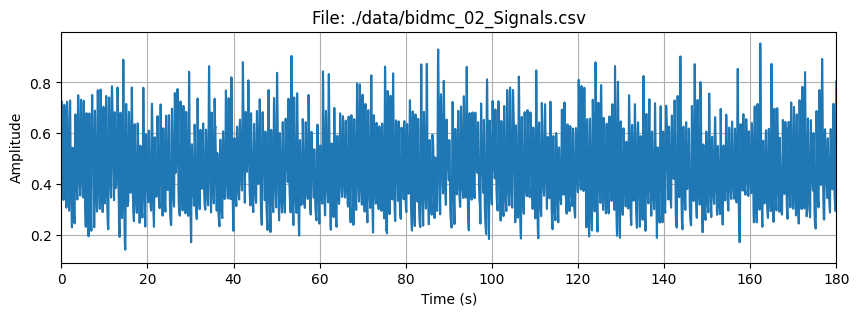

In [8]:
# Plot 180 seconds of the ppg signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

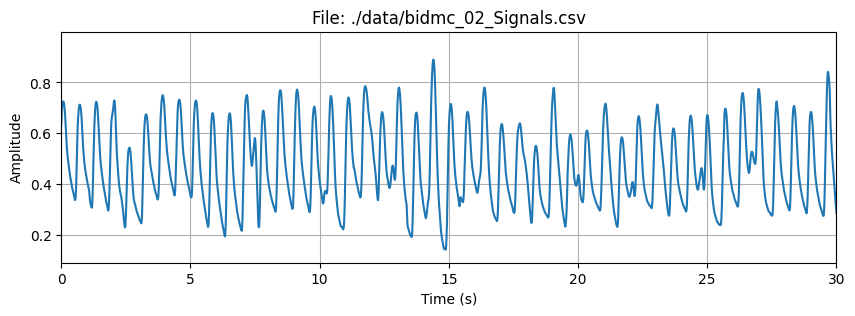

In [9]:
# Plot 10 seconds of the ppg signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 30) # Zoom in to the first 10 seconds
plt.grid()
plt.show()

## Find the peaks

In [10]:
# Find the peaks
peaks, properties = find_peaks(ppg, height=0.5)

Documentation: [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html), See Examples.

The `find_peaks` algorithm in the `scipy.signal` module is designed to identify local maxima (peaks) in a 1-D array. Here's a breakdown of how it works:

1. **Basic Peak Detection**: The algorithm first identifies all local maxima by comparing each data point to its neighbors. A point is considered a peak if it is greater than its immediate neighbors.

2. **Optional Parameters**: You can refine the peak detection using several optional parameters:
   - **Height**: Specifies the required height of peaks. Only peaks with heights greater than this value are considered.
   - **Threshold**: Sets the minimum vertical distance to neighboring points. This helps in distinguishing significant peaks from noise.
   - **Distance**: Defines the minimum horizontal distance between neighboring peaks. Peaks closer than this distance are merged, with smaller peaks being removed first.
   - **Prominence**: Measures how much a peak stands out due to its height and its distance from other peaks. This is useful for identifying significant peaks in a signal with varying baseline levels.
   - **Width**: Specifies the required width of peaks at a relative height. This helps in identifying broader peaks.
   - **Plateau Size**: Determines the size of the flat top of peaks, useful for identifying peaks with flat summits
   
3. **Output**: The function returns the indices of the peaks that meet the specified conditions. Additionally, it can return a dictionary containing properties of the peaks, such as their heights, prominences, and widths.

Here's an example of how to use `find_peaks` with some of these parameters:

```python
import numpy as np
from scipy.signal import find_peaks

# Generate a sample signal
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.1, x.size)

# Find peaks with specific conditions
peaks, properties = find_peaks(y, height=0, distance=10, prominence=0.1, width=5)

print("Peaks:", peaks)
print("Peak properties:", properties)
```

This code will identify peaks in the `y` array that meet the specified height, distance, prominence, and width criteria.

References:

1.  [scipy.signal.find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)
1. [How find_peaks algorithm works](https://bing.com/search?q=how+find_peaks+algorithm+works)


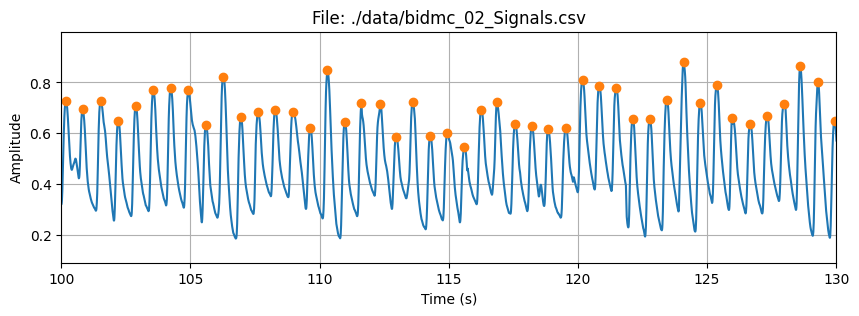

In [11]:
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130) 

plt.grid()
plt.show()

Notice, how the peak detection finds both positive and negative peaks. the aim is to find the positive peaks only.

## Calculate IBI values

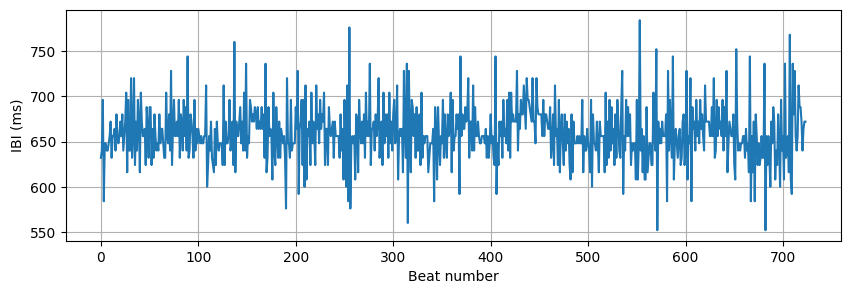

In [16]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Example: select the beats with IBI between 600 and 800 ms
# Uncomment and modify, if needed
i = (ppi > 500) & (ppi < 800)
ppi = ppi[i]

# Example: select the beats from 10 to 310. 
# Uncomment  and modify, if needed
# ppi = ppi[10:310]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()


Notice, how there is lot of variation (noise) in the inter-beat-intervals, as the peak detection is detecting also the negative peaks. You should try at least the height parameter for the peak detection algorithm.

For that reason (fault peak detection), the following mean of PPI and heart rate are also wrong.

## Calculate mean values

In [17]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')


Mean IBI: 659.52 ms
Heart rate: 90.97 bpm


## Useful numerical functions

**DON'T copy to your answer! This for your reference only!**

In [14]:
# Some example data
x = np.array([1000, 1010, 1020, 1030, 1040, 1050])

# Some numpy functions
x_sqrt = np.sqrt(x) # Square root
x_2 = x**2 # Square
x_diff = np.diff(x) # Difference
x_mean = np.mean(x) # Mean
x_std = np.std(x) # Standard deviation
x_rmssd = np.sqrt(np.mean(np.diff(x)**2)) # Root mean square of successive differences

# Print the results
print(f'Original: {x}')
print('Square roots:', [np.round(val,2) for val in x_sqrt])
print(f'Squares: {x_2}')
print(f'Differences: {x_diff}')
print(f'Mean: {x_mean:.2f}')
print(f'SDNN: {x_std:.2f}')
print(f'RMSSD: {x_rmssd:.2f}')


Original: [1000 1010 1020 1030 1040 1050]
Square roots: [np.float64(31.62), np.float64(31.78), np.float64(31.94), np.float64(32.09), np.float64(32.25), np.float64(32.4)]
Squares: [1000000 1020100 1040400 1060900 1081600 1102500]
Differences: [10 10 10 10 10]
Mean: 1025.00
SDNN: 17.08
RMSSD: 10.00


## Interpretations

You could add something like this at the end of your file.

- First, ...
- Second, ...
- And lastly, ....